# Predicting House Rental Price

## Objective:
The objective of this project is to create a predictive model for accurately estimating house rental prices. We will leverage various attributes of the houses, such as size (square footage), number of bedrooms and bathrooms, and additional features (e.g., amenities, location (latitude and longitude)) to make these predictions. Understanding the factors influencing house rental prices can provide valuable insights for both renters and property owners, enabling data-informed decisions in the real estate market.

## Business Problem:
A real estate agency is looking to optimize the process of estimating house rental prices for both property owners and potential renters. They want to ensure that rental prices are accurately and fairly determined, taking into account the various factors that influence pricing. The agency aims to provide a data-driven solution that benefits both landlords and tenants in the real estate market.

Specifically, the agency wants to address the following challenges:
1. **Fair Pricing:** Property owners want to set fair rental prices for their houses based on factors such as location, size, number of bedrooms and bathrooms, and additional amenities. The challenge is to determine a reasonable rental price that attracts tenants while ensuring property owners receive competitive returns.
2. **Informed Renting:** Renters seek transparent and data-driven information about rental prices to make informed decisions. They want to understand why certain properties are priced the way they are and whether they offer good value for money.
3. **Market Trends:** The real estate agency wants to stay competitive by understanding market trends and how various features impact rental prices. By analyzing the data, they aim to identify key factors that influence rental pricing and adapt their strategies accordingly.

To address these challenges, the agency intends to create a predictive model that accurately estimates house rental prices. This model will consider multiple attributes, including property size, location, amenities, and other features, to provide a fair and data-informed rental pricing system. The goal is to empower both property owners and renters with insights into the factors affecting rental prices, leading to more informed and mutually beneficial rental agreements.

## Approach:

1. **Data Loading and Exploration:**
   - Load the dataset and explore its structure, including variables and their data types.
2. **Data Preprocessing:**
   - Address missing values, remove duplicates, and ensure consistent data types for effective analysis.
3. **Exploratory Data Analysis (EDA):**
   - Conduct both visual and statistical exploration to understand data distribution and relationships between variables.
4. **Feature Engineering:**
   - Enhance the dataset by creating, modifying, or selecting relevant features to improve model performance.
5. **Model Building and Evaluation:**
   - Utilize regression techniques such as Random Forest, Decision Tree, Linear Regression, and Gradient Booster Regression to construct predictive models.
   - Evaluate the model's performance using appropriate metrics and select the most effective model based on these evaluations.
6. **Price Categorization:**
   - Implement Random Forest Classification to categorize the predicted rental prices into groups like "Low," "Medium-Low", "Medium-High", and "High" to provide a broader understanding of the rental price range.

This comprehensive methodology encompasses data exploration, cleaning, feature engineering, regression modeling, and price categorization, offering a holistic approach to house rental price prediction and analysis.

In [ ]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("C:/Users/purna/Downloads/apartments.xlsx")

In [3]:
data.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,2195.0,Monthly,542.0,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,1250.0,Monthly,1500.0,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,1395.0,Monthly,1650.0,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,1600.0,Monthly,820.0,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,975.0,Monthly,624.0,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [4]:
data.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [5]:
selected_columns = ['bathrooms', 'bedrooms', 'square_feet', 'cityname', 'price']

# Create a new DataFrame with only the selected columns
df = data[selected_columns]
df.head()

,bathrooms,bedrooms,square_feet,cityname,price
0,1.0,1.0,542.0,Redondo Beach,2195.0
1,1.5,3.0,1500.0,Newport News,1250.0
2,2.0,3.0,1650.0,Raleigh,1395.0
3,1.0,2.0,820.0,Vacaville,1600.0
4,1.0,1.0,624.0,Albuquerque,975.0


In [6]:
df.isnull().sum()

bathrooms       70
bedrooms       131
square_feet      7
cityname       309
price            8
dtype: int64

In [7]:
df = df.dropna() #droping null

In [8]:
df.isnull().sum()

bathrooms      0
bedrooms       0
square_feet    0
cityname       0
price          0
dtype: int64

In [9]:
df.shape

(99508, 5)

In [10]:
df.isnull().sum()

bathrooms      0
bedrooms       0
square_feet    0
cityname       0
price          0
dtype: int64

In [11]:
df.describe()

,bathrooms,bedrooms,square_feet,price
count,99508.000000,99508.000000,99508.000000,99508.000000
mean,1.445939,1.728414,956.067562,1525.780400
std,0.547014,0.748422,365.126451,897.978499
min,1.000000,0.000000,107.000000,100.000000
25%,1.000000,1.000000,730.000000,1014.000000
50%,1.000000,2.000000,900.000000,1350.000000
75%,2.000000,2.000000,1115.250000,1795.000000
max,9.000000,9.000000,12000.000000,52500.000000


In [12]:
df

,bathrooms,bedrooms,square_feet,cityname,price
0,1.0,1.0,542.0,Redondo Beach,2195.0
1,1.5,3.0,1500.0,Newport News,1250.0
2,2.0,3.0,1650.0,Raleigh,1395.0
3,1.0,2.0,820.0,Vacaville,1600.0
4,1.0,1.0,624.0,Albuquerque,975.0
...,...,...,...,...,...
99995,1.0,1.0,605.0,Houston,780.0
99996,2.0,2.0,921.0,Jacksonville,813.0
99997,1.0,1.0,650.0,San Diego,1325.0
99998,1.0,1.0,701.0,Huntersville,931.0


In [13]:
df.cityname.unique()

array(['Redondo Beach', 'Newport News', 'Raleigh', ..., 'Osseo', 'Vestal',
       'Albertville'], dtype=object)

In [14]:
df.cityname = df.cityname.apply(lambda x: x.strip())
loction_stats = df.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)
loction_stats
#Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

cityname
Dallas           2864
Denver           2765
Los Angeles      2407
Las Vegas        1859
Arlington        1571
                 ... 
Richlands           1
Greenwich           1
Richmond Hill       1
Greensburg          1
San Jacinto         1
Name: cityname, Length: 2980, dtype: int64

In [15]:
len(loction_stats[loction_stats<=10])

1978

In [16]:
loction_stats_less_than_10 = loction_stats[loction_stats<=10]
loction_stats_less_than_10
#Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns


cityname
Abilene                10
Rancho Palos Verdes    10
Southfield             10
Stockton               10
Montrose               10
                       ..
Richlands               1
Greenwich               1
Richmond Hill           1
Greensburg              1
San Jacinto             1
Name: cityname, Length: 1978, dtype: int64

In [17]:
len(df.cityname.unique())

2980

In [18]:
df.cityname = df.cityname.apply(lambda x: 'other' if x in loction_stats_less_than_10 else x)
len(df.cityname.unique())

1003

In [19]:
df.shape

(99508, 5)

In [20]:
df[df.square_feet/df.bedrooms<250].head()# we cannot justify a bedroom have area<250 sqft

,bathrooms,bedrooms,square_feet,cityname,price
19,1.0,2.0,435.0,Portland,1250.0
48,1.0,2.0,431.0,Arlington,1549.0
53,1.0,2.0,314.0,Ogden,650.0
55,1.0,2.0,390.0,Providence,2095.0
82,1.0,2.0,468.0,Omaha,885.0


In [21]:
df.shape

(99508, 5)

In [22]:
zero_bed_rows = df[df['bedrooms'] == 0]
print(len(zero_bed_rows))

646


In [23]:
df[df.square_feet/df.bedrooms<250].shape #how many row with 250 sqft

(1485, 5)

In [24]:
df1 = df[~(df.square_feet/df.bedrooms<250)]
df1.shape

(98023, 5)

In [25]:
df1.square_feet.describe()

count    98023.000000
mean       963.100833
std        363.006746
min        107.000000
25%        738.000000
50%        907.000000
75%       1120.000000
max      12000.000000
Name: square_feet, dtype: float64

In [26]:
df1.isnull().sum()

bathrooms      0
bedrooms       0
square_feet    0
cityname       0
price          0
dtype: int64

In [27]:
df2 = df1.copy() # calculating price oer sqft
df2['price_per_sqft'] = df2['price']/df2['square_feet']
df2.head()

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,542.0,Redondo Beach,2195.0,4.049815
1,1.5,3.0,1500.0,Newport News,1250.0,0.833333
2,2.0,3.0,1650.0,Raleigh,1395.0,0.845455
3,1.0,2.0,820.0,Vacaville,1600.0,1.951220
4,1.0,1.0,624.0,Albuquerque,975.0,1.562500


In [28]:
#one standerd deviation
#per location mean and standerd deviation
#filter out data which are beyond this deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('cityname'):
        m = np.mean(subdf.price_per_sqft)#mean
        st = np.std(subdf.price_per_sqft)#sandered deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        #beyond the deviation
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df2)
df7.shape

(71913, 6)

In [29]:
df7 = df7[df7['bedrooms'] > 0] #removing row with 0 bedroom

In [30]:
df7

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,976.0,Aberdeen,1455.0,1.490779
1,1.0,2.0,837.0,Aberdeen,1088.0,1.299881
2,2.0,2.0,1172.0,Aberdeen,1477.0,1.260239
3,2.0,2.0,1187.0,Aberdeen,1722.0,1.450716
4,1.0,2.0,1014.0,Aberdeen,1370.0,1.351085
...,...,...,...,...,...,...
71908,2.0,2.0,1162.0,other,930.0,0.800344
71909,3.5,6.0,3980.0,other,2195.0,0.551508
71910,2.5,4.0,2932.0,other,1850.0,0.630969
71911,2.0,2.0,1000.0,other,1314.0,1.314000


In [32]:
df7.describe()

,bathrooms,bedrooms,square_feet,price,price_per_sqft
count,71594.000000,71594.000000,71594.000000,71594.000000,71594.000000
mean,1.463558,1.719208,959.101768,1503.555480,1.601094
std,0.534539,0.693078,304.888906,788.133803,0.684879
min,1.000000,1.000000,250.000000,200.000000,0.403846
25%,1.000000,1.000000,752.000000,1023.000000,1.138889
50%,1.000000,2.000000,920.000000,1346.000000,1.428571
75%,2.000000,2.000000,1114.000000,1758.000000,1.869967
max,8.500000,9.000000,11318.000000,35000.000000,7.063197


In [33]:
df7 = df7.dropna(subset=['cityname'])

In [34]:
df7.shape

(71594, 6)

In [35]:
df7

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,976.0,Aberdeen,1455.0,1.490779
1,1.0,2.0,837.0,Aberdeen,1088.0,1.299881
2,2.0,2.0,1172.0,Aberdeen,1477.0,1.260239
3,2.0,2.0,1187.0,Aberdeen,1722.0,1.450716
4,1.0,2.0,1014.0,Aberdeen,1370.0,1.351085
...,...,...,...,...,...,...
71908,2.0,2.0,1162.0,other,930.0,0.800344
71909,3.5,6.0,3980.0,other,2195.0,0.551508
71910,2.5,4.0,2932.0,other,1850.0,0.630969
71911,2.0,2.0,1000.0,other,1314.0,1.314000


In [36]:
#this converts a categorical column to a numeric, dummy encoded representation suitable for many machine learning models. The NaN handling and astype(int) give us an clean 0/1 encoding.

dummies = pd.get_dummies(df7['cityname'], dummy_na=True) 
dummies = dummies.astype(int)
print(dummies.head(3))

   Aberdeen  Abingdon  Abington  Absecon  Acton  Addison  Akron  Albuquerque  \
0         1         0         0        0      0        0      0            0   
1         1         0         0        0      0        0      0            0   
2         1         0         0        0      0        0      0            0   

   Alexandria  Alhambra  ...  Youngstown  Ypsilanti  Yukon  Yulee  Yuma  \
0           0         0  ...           0          0      0      0     0   
1           0         0  ...           0          0      0      0     0   
2           0         0  ...           0          0      0      0     0   

   Zachary  Zebulon  Zephyrhills  other  NaN  
0        0        0            0      0    0  
1        0        0            0      0    0  
2        0        0            0      0    0  

[3 rows x 1004 columns]


In [37]:
df8 = pd.concat([df7,dummies.drop('other', axis= 'columns')], axis = 'columns') #adding city in unique form of 0 and 1
df8.head()

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft,Aberdeen,Abingdon,Abington,Absecon,...,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,NaN
0,1.0,1.0,976.0,Aberdeen,1455.0,1.490779,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,837.0,Aberdeen,1088.0,1.299881,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1172.0,Aberdeen,1477.0,1.260239,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1187.0,Aberdeen,1722.0,1.450716,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,1014.0,Aberdeen,1370.0,1.351085,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df9 = df8.drop('cityname',axis = 'columns') #now no need of cityname
df9.head()

,bathrooms,bedrooms,square_feet,price,price_per_sqft,Aberdeen,Abingdon,Abington,Absecon,Acton,...,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,NaN
0,1.0,1.0,976.0,1455.0,1.490779,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,837.0,1088.0,1.299881,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1172.0,1477.0,1.260239,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1187.0,1722.0,1.450716,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,1014.0,1370.0,1.351085,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df9

,bathrooms,bedrooms,square_feet,price,price_per_sqft,Aberdeen,Abingdon,Abington,Absecon,Acton,...,Yorktown,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,NaN
0,1.0,1.0,976.0,1455.0,1.490779,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,837.0,1088.0,1.299881,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1172.0,1477.0,1.260239,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1187.0,1722.0,1.450716,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,1014.0,1370.0,1.351085,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71908,2.0,2.0,1162.0,930.0,0.800344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71909,3.5,6.0,3980.0,2195.0,0.551508,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71910,2.5,4.0,2932.0,1850.0,0.630969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71911,2.0,2.0,1000.0,1314.0,1.314000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


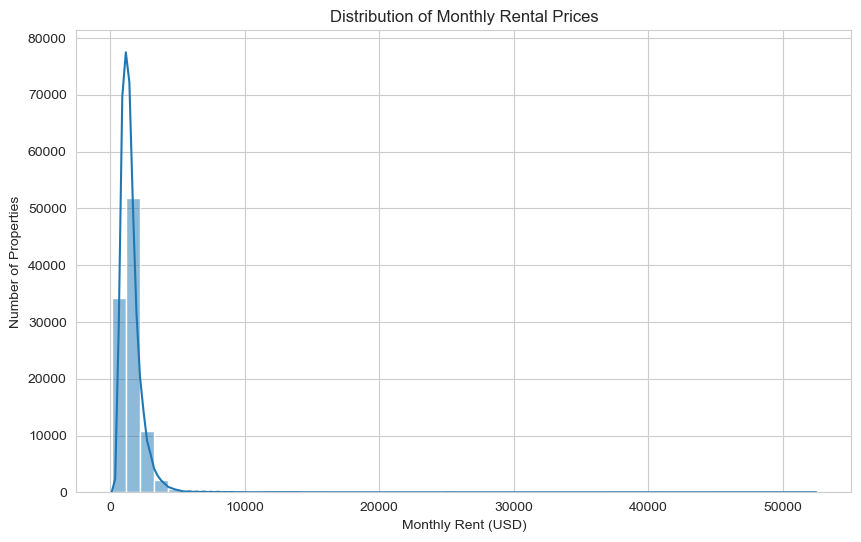

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Histogram of rental prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Monthly Rental Prices')
plt.xlabel('Monthly Rent (USD)')
plt.ylabel('Number of Properties')
plt.show()

It appears to be right-skewed, indicating that most properties have a lower rent, with a few properties having significantly higher rent.

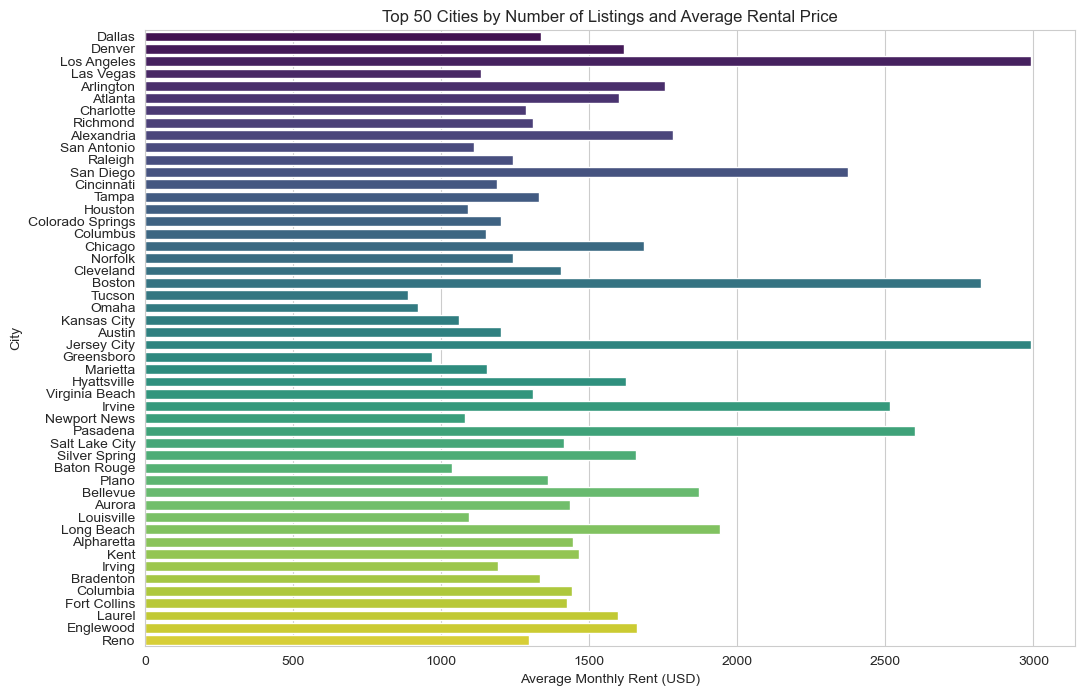

In [55]:
# Group by city and calculate the mean rental price and count of listings
city_rental_prices = data.groupby('cityname').agg({
    'price': 'mean',
    'id': 'count'
}).rename(columns={'price': 'Average_Rent', 'id': 'Listing_Count'}).reset_index()

# Sort by the number of listings to get the top cities
top_cities = city_rental_prices.sort_values('Listing_Count', ascending=False).head(50)

# Bar plot for top cities by listing count and their average rental price
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Rent', y='cityname', data=top_cities, palette='viridis')
plt.title('Top 50 Cities by Number of Listings and Average Rental Price')
plt.xlabel('Average Monthly Rent (USD)')
plt.ylabel('City')
plt.show()


- **Top Cities by Listings:** The cities with the most listings are displayed at the top of the plot, and they have varying average rental prices. This indicates that cities with a high number of listings can have a wide range of rental price levels.
- **Price Range:** Some cities with a high number of listings may have both higher and lower average rental prices. This suggests that factors such as location, property type, and local market conditions can influence rental rates.
- **Insights for Real Estate:** This visualization can be valuable for real estate professionals and investors. It helps identify cities with significant rental property availability, allowing them to analyze potential investment opportunities in these locations.
- **Market Trends:** The plot can also reveal market trends, as cities with high listing counts may indicate a strong rental market or high demand for rental properties.

Overall, the code and the resulting bar plot provide a clear overview of the top cities by the number of listings and their corresponding average rental prices, allowing for quick comparisons and insights into the rental market.

C:\Users\purna\AppData\Local\Temp\ipykernel_40032\3117429753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


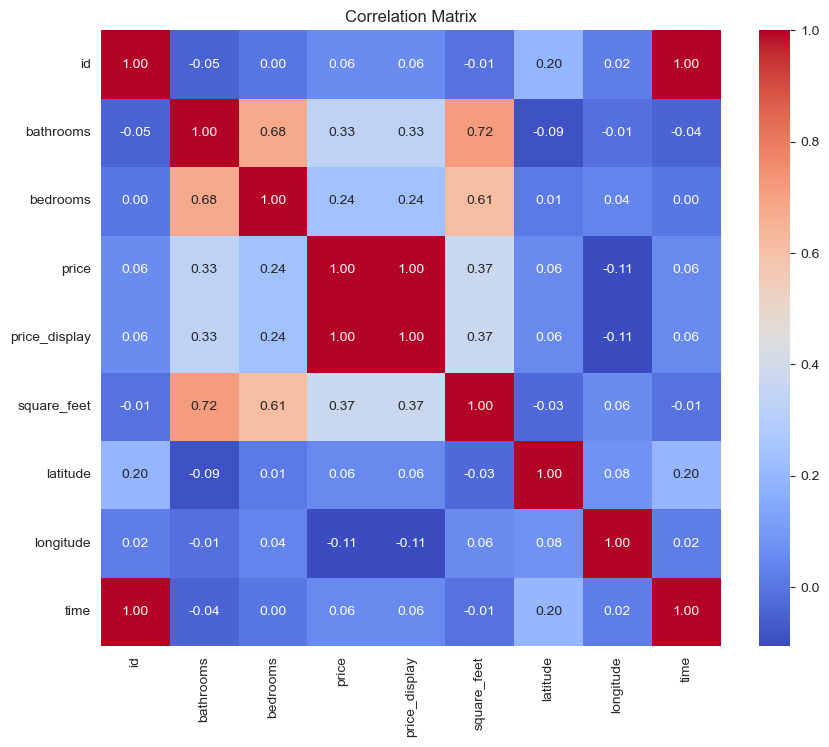

price            1.000000
price_display    1.000000
square_feet      0.371996
bathrooms        0.329824
bedrooms         0.237422
id               0.058232
latitude         0.057230
time             0.056732
longitude       -0.106382
Name: price, dtype: float64

In [56]:
# Calculating correlation matrix
correlation_matrix = data.corr()

# Filtering correlations with the price
correlations_with_price = correlation_matrix["price"].sort_values(ascending=False)

# Visualizing correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Displaying correlations with price
correlations_with_price

**Price and Other Features:**
    
- "Square Feet" and "Bathrooms" have positive correlations with "Price" (around 0.372 and 0.330, respectively), indicating that larger square footage and more bathrooms tend to increase house prices.
- "Bedrooms" also shows a positive correlation with "Price" (around 0.237), but it's weaker.
- "ID," "Latitude," and "Time" have relatively weak positive correlations with "Price."
- "Longitude" has a slight negative correlation with "Price" (around -0.106), suggesting houses further west may have slightly lower prices.

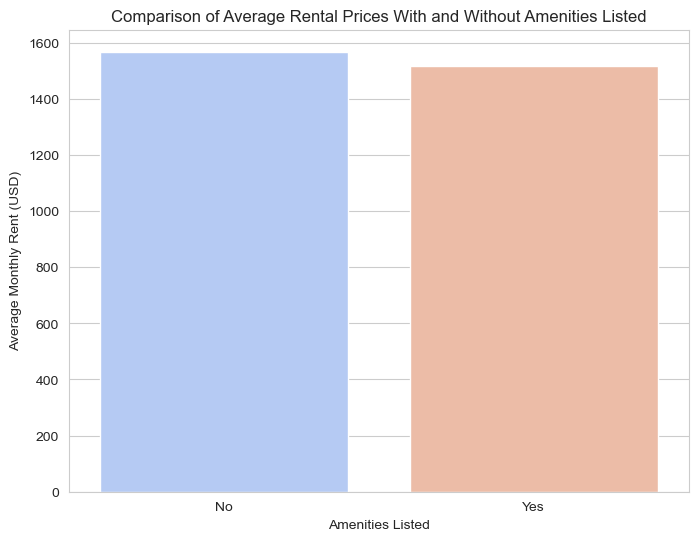

In [57]:
# Create a binary feature indicating whether amenities are listed for a property
df['amenities_listed'] = data['amenities'].notna()

# Group by the presence of amenities and calculate average rent
amenities_rent_comparison = df.groupby('amenities_listed').agg({
    'price': 'mean'
}).rename(columns={'price': 'Average_Rent'}).reset_index()

# Bar plot to compare average rental prices with and without amenities listed
plt.figure(figsize=(8, 6))
sns.barplot(x='amenities_listed', y='Average_Rent', data=amenities_rent_comparison, palette='coolwarm')
plt.title('Comparison of Average Rental Prices With and Without Amenities Listed')
plt.xlabel('Amenities Listed')
plt.ylabel('Average Monthly Rent (USD)')
plt.xticks([0, 1], ['No', 'Yes'])  # Set the x-ticks to show 'No' and 'Yes'
plt.show()

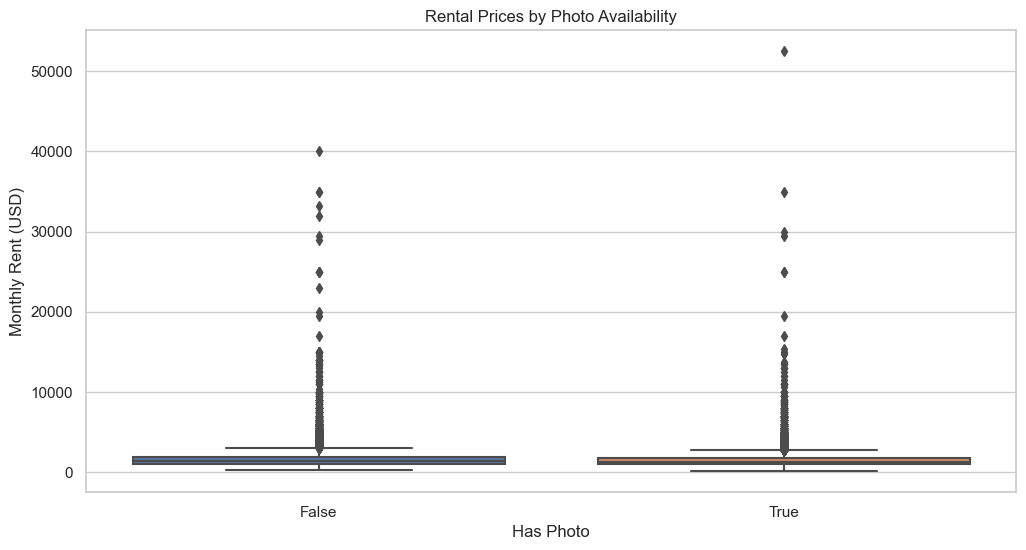

In [96]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='has_photo', y='price_display', data=data)
plt.title('Rental Prices by Photo Availability')
plt.xlabel('Has Photo')
plt.ylabel('Monthly Rent (USD)')
plt.show()

**Rental Prices by Photo Availability:**
The box plot indicates that listings with photos ('Thumbnail' or 'Yes') tend to have higher rental prices compared to those without photos ('No'). This suggests that listings with photos might be perceived as more appealing or may be of higher quality, which commands higher rent.

C:\Users\purna\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


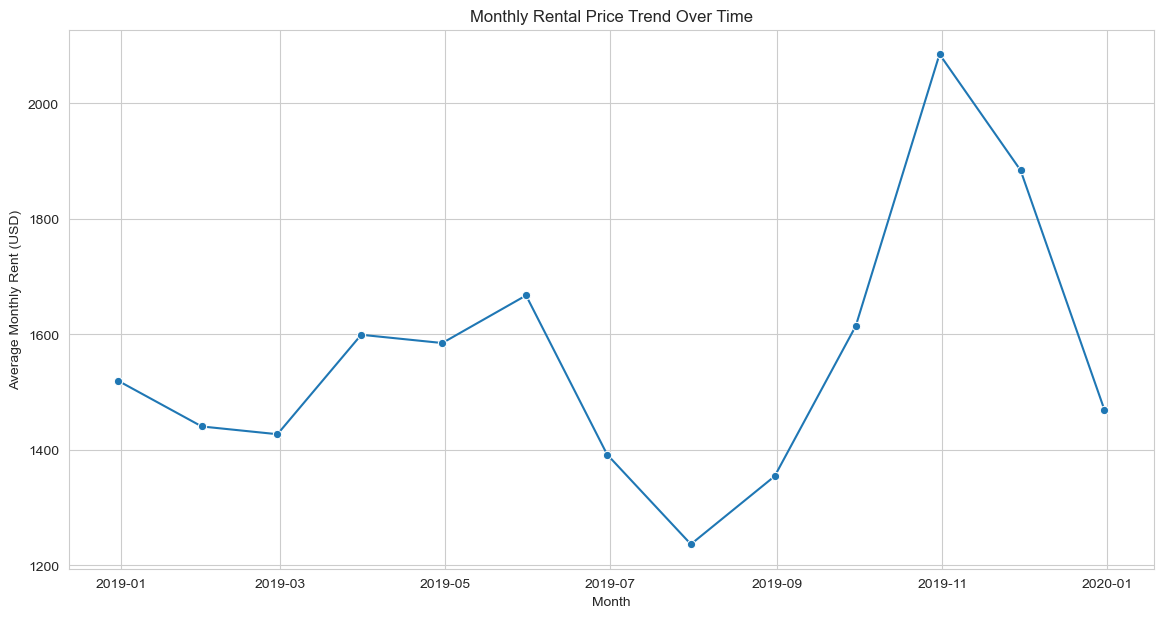

In [59]:
# Convert 'time' to datetime format
data['date_posted'] = pd.to_datetime(data['time'], unit='s')

# Create a new dataframe with date and price_display
time_rent_df = data[['date_posted', 'price_display']].copy()
time_rent_df.set_index('date_posted', inplace=True)

# Resample the data by month and calculate the mean
monthly_rent_trend = time_rent_df.resample('M').mean()

# Time series plot of rental prices over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_rent_trend, x=monthly_rent_trend.index, y='price_display', marker='o')
plt.title('Monthly Rental Price Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Monthly Rent (USD)')
plt.show()

**Rent Price Trends Over Time:** 
We can examine how rental prices have changed over time.

**Seasonal Demand:**
Demand for housing might be influenced by the time of year. For example, November could see higher demand due to people trying to secure homes before the holiday season or the end of the year.
August might see lower demand as people may be on vacation or less inclined to move during the summer.


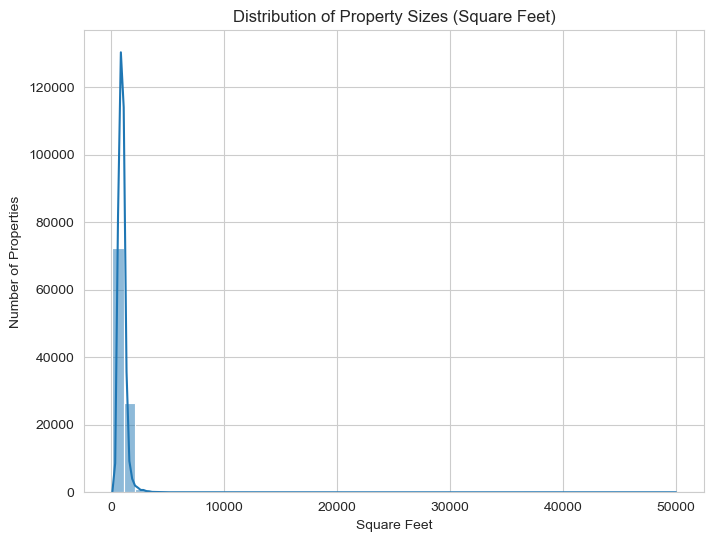

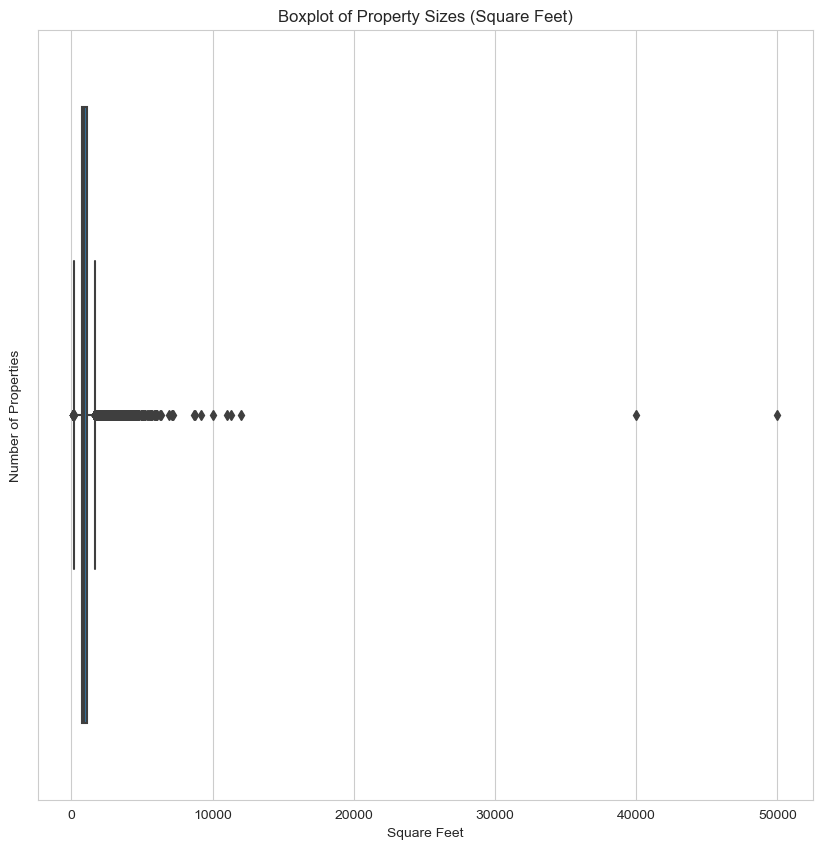

In [60]:
# First, we'll examine the size distribution of properties
# Histogram of property sizes
plt.figure(figsize=(8, 6))
sns.histplot(data['square_feet'].dropna(), bins=50, kde=True)
plt.title('Distribution of Property Sizes (Square Feet)')
plt.xlabel('Square Feet')
plt.ylabel('Number of Properties')

# Show the plot
plt.show()

# Now, let's create a boxplot to visualize the distribution of property sizes and identify any outliers
plt.figure(figsize=(10, 10))
sns.boxplot(x=data['square_feet'])
plt.title('Boxplot of Property Sizes (Square Feet)')
plt.xlabel('Square Feet')
plt.ylabel('Number of Properties')

# Show the plot
plt.show()

**Size Distribution:**
Analyze the distribution of property sizes (square footage) to see the range and commonality of different property sizes.

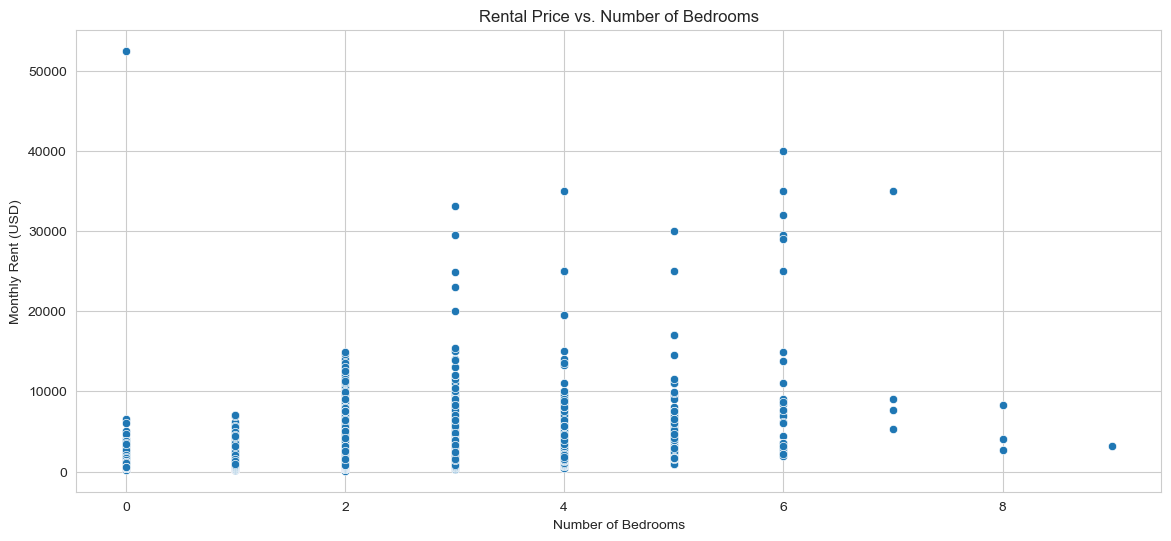

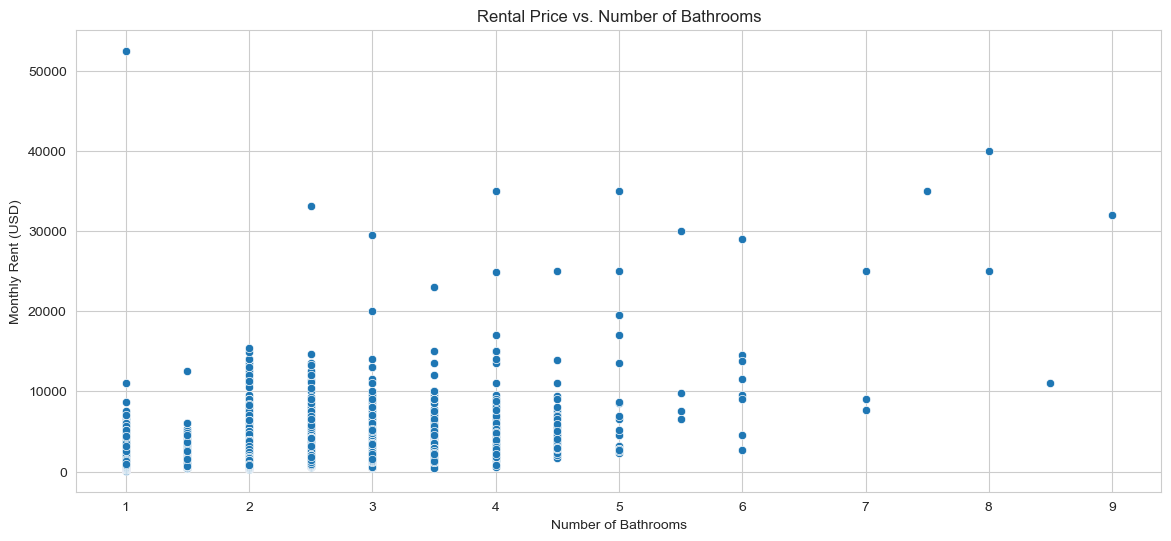

In [61]:
# For the room count influence, we'll look at the relationships between the number of bedrooms,
# the number of bathrooms, and the rental price.
# Scatter plot for bedrooms vs rental price
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['bedrooms'], y=data['price_display'])
plt.title('Rental Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Monthly Rent (USD)')

# Show the plot
plt.show()

# Scatter plot for bathrooms vs rental price
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data['bathrooms'], y=data['price_display'])
plt.title('Rental Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Monthly Rent (USD)')

# Show the plot
plt.show()

The scatter plots we've created show the relationships between the number of bedrooms, the number of bathrooms, and the rental price in terms of monthly rent (USD). Let's analyze the insights from these plots:

1. **Rental Price vs. Number of Bedrooms:**
   - As the number of bedrooms increases, there is a general trend of higher rental prices. This is expected because larger homes with more bedrooms tend to command higher rents.
   - However, there is some variability in the data, with a wide range of rents even for homes with the same number of bedrooms. This suggests that other factors, such as location, amenities, and property condition, also influence rental prices.
   
2. **Rental Price vs. Number of Bathrooms:**
   - Similar to the number of bedrooms, the number of bathrooms also shows a positive relationship with rental prices. More bathrooms are typically associated with higher rents.
   - The data points are more spread out for different bathroom counts, indicating that the number of bathrooms may have a relatively stronger influence on rent compared to the number of bedrooms.
   
In both cases, it's important to consider other factors that may be affecting the rental prices, such as location, square footage, property type, and property condition. These factors can interact with the number of bedrooms and bathrooms to determine the final rent.

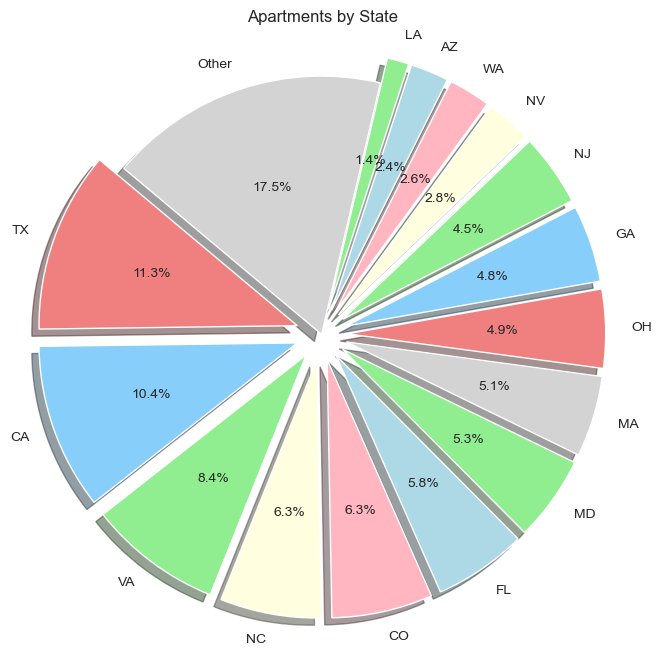

In [63]:
state_counts = data['state'].value_counts()

# Calculate the threshold for the "Other" category
total_apartments = len(data)
threshold = 0.013 * total_apartments  # You can adjust this threshold as needed

# Group states with counts less than the threshold as "Other"
state_counts_filtered = state_counts[state_counts >= threshold]
other_count = state_counts[state_counts < threshold].sum()
state_counts_filtered['Other'] = other_count

# Create a larger pie chart
fig, ax = plt.subplots(figsize=(8, 8))

labels = state_counts_filtered.index
sizes = state_counts_filtered.values
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightblue', 'lightgreen', 'lightgrey']

# Generate explode values
explode = [0.1 if label != 'Other' else 0 for label in labels]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle

plt.title('Apartments by State')
plt.show()


**Inference from Pie Chart:**
The pie chart provides a quick and intuitive overview of the distribution of apartments among different states, making it easy to identify which states have the most significant presence and which ones have relatively fewer apartments.

In [41]:
selected_columns = ['bathrooms', 'bedrooms', 'square_feet']
# Create a new DataFrame with only the selected columns
X = df9.drop('price',axis='columns')
y = df9['price']

In [42]:
X.columns = X.columns.astype(str)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

# Evaluate the models
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)

dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Print the evaluation metrics
print("Gradient Boosting Regressor:")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"R-squared (R2): {gb_r2}")
print(f"RMSE: {gb_rmse}")

print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {dt_mse}")
print(f"Mean Absolute Error (MAE): {dt_mae}")
print(f"R-squared (R2): {dt_r2}")
print(f"RMSE: {dt_rmse}")

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R-squared (R2): {rf_r2}")
print(f"RMSE: {rf_rmse}")


Gradient Boosting Regressor:
Mean Squared Error (MSE): 8914.543432809622
Mean Absolute Error (MAE): 25.47281063143659
R-squared (R2): 0.9874666627120914
RMSE: 94.41685989699944
Decision Tree Regressor:
Mean Squared Error (MSE): 88637.11285725805
Mean Absolute Error (MAE): 158.43210724275195
R-squared (R2): 0.875381297983502
RMSE: 297.7198563368894
Random Forest Regressor:
Mean Squared Error (MSE): 48382.508089760464
Mean Absolute Error (MAE): 121.30899559909332
R-squared (R2): 0.9319769658093624
RMSE: 219.9602420660617


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Linear Regression model
lr_regressor = LinearRegression()

# Train the model
lr_regressor.fit(X_train, y_train)

# Make price predictions
y_pred = lr_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"RMSE: {rmse}")


Linear Regression:
Mean Squared Error (MSE): 105155.52050958548
Mean Absolute Error (MAE): 114.40026945149091
R-squared (R2): 0.8521573632832882
RMSE: 324.27691948331056


In [47]:
df9['price'].describe()

count    71594.000000
mean      1503.555480
std        788.133803
min        200.000000
25%       1023.000000
50%       1346.000000
75%       1758.000000
max      35000.000000
Name: price, dtype: float64

In [48]:
import pandas as pd

# Assuming you have a DataFrame with a "price" column
# Replace 'your_dataframe' with the actual name of your DataFrame
# For example, if your DataFrame is named 'df', use 'df['price']'

price_data = df9['price']

# Define bin edges based on percentiles
bin_edges = [price_data.min(), price_data.quantile(0.25), price_data.quantile(0.5), price_data.quantile(0.75), price_data.max()]

# Define bin labels
bin_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

# Use cut to categorize "price" into bins
price_data_bins = pd.cut(price_data, bins=bin_edges, labels=bin_labels)

# Add the 'price_bins' column to your DataFrame
df9['price_bins'] = price_data_bins


In [49]:
df9

,bathrooms,bedrooms,square_feet,price,price_per_sqft,Aberdeen,Abingdon,Abington,Absecon,Acton,...,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,NaN,price_bins
0,1.0,1.0,976.0,1455.0,1.490779,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
1,1.0,2.0,837.0,1088.0,1.299881,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-Low
2,2.0,2.0,1172.0,1477.0,1.260239,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
3,2.0,2.0,1187.0,1722.0,1.450716,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
4,1.0,2.0,1014.0,1370.0,1.351085,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71908,2.0,2.0,1162.0,930.0,0.800344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Low
71909,3.5,6.0,3980.0,2195.0,0.551508,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,High
71910,2.5,4.0,2932.0,1850.0,0.630969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,High
71911,2.0,2.0,1000.0,1314.0,1.314000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-Low


Based on the provided statistics for the "price" variable, you can create classification bins as follows:

"Low" for prices between 200 and 1023 (25th percentile)
"Medium-Low" for prices between 1024 and 1346 (50th percentile)
"Medium-High" for prices between 1347 and 1758 (75th percentile)
"High" for prices between 1759 and 35000 (maximum)

These bins are defined based on the quartiles (25th, 50th, and 75th percentiles) and can help categorize the "price" variable into different classes. You can use these bins for classification purposes in your analysis.

In [50]:
classif=df9
classif

,bathrooms,bedrooms,square_feet,price,price_per_sqft,Aberdeen,Abingdon,Abington,Absecon,Acton,...,Youngstown,Ypsilanti,Yukon,Yulee,Yuma,Zachary,Zebulon,Zephyrhills,NaN,price_bins
0,1.0,1.0,976.0,1455.0,1.490779,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
1,1.0,2.0,837.0,1088.0,1.299881,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-Low
2,2.0,2.0,1172.0,1477.0,1.260239,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
3,2.0,2.0,1187.0,1722.0,1.450716,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
4,1.0,2.0,1014.0,1370.0,1.351085,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71908,2.0,2.0,1162.0,930.0,0.800344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Low
71909,3.5,6.0,3980.0,2195.0,0.551508,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,High
71910,2.5,4.0,2932.0,1850.0,0.630969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,High
71911,2.0,2.0,1000.0,1314.0,1.314000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium-Low


In [51]:
classif.dtypes

bathrooms          float64
bedrooms           float64
square_feet        float64
price              float64
price_per_sqft     float64
                    ...   
Zachary              int32
Zebulon              int32
Zephyrhills          int32
NaN                  int32
price_bins        category
Length: 1009, dtype: object

In [52]:
classif['price_bins'] = pd.Categorical(classif['price_bins'])
classif['price_bins'] = classif['price_bins'].cat.codes 

In [53]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = classif.drop(['price_bins', 'price'], axis=1)
y = classif['price_bins']
X.columns = X.columns.astype(str)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{confusion}')


Accuracy: 0.9708778545987848
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.98      0.99      0.99      3589
           1       0.97      0.96      0.96      3595
           2       0.95      0.96      0.96      3622
           3       0.98      0.97      0.98      3512

    accuracy                           0.97     14319
   macro avg       0.78      0.78      0.78     14319
weighted avg       0.97      0.97      0.97     14319

Confusion Matrix:
[[   0    1    0    0    0]
 [   0 3544   45    0    0]
 [   0   57 3460   77    1]
 [   0    3   79 3486   54]
 [   0    0    0  100 3412]]


C:\Users\purna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\purna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\purna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Interpretation:

The provided code utilizes a Random Forest classifier to predict price categories based on a dataset. Here are the key results and inferences:

- **Accuracy:** 
    
  - The model achieves an accuracy of approximately 97.09%, indicating that it correctly classifies the price categories for the majority of the test data.

- **Classification Report:**
    
  - **Precision:** Precision is a measure of the model's accuracy in classifying items within a specific category. The report shows that the model has high precision for categories 0, 1, 2, and 3, indicating that it makes accurate positive predictions for these categories. However, for category -1, precision is lower, as there is only one instance in that category.
  - **Recall:** Recall measures the ability of the model to identify all relevant instances within a category. The report indicates high recall for categories 0, 1, 2, and 3, suggesting that the model effectively identifies most instances of these categories. For category -1, recall is also lower due to the small number of instances.
  - **F1-Score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Categories 0, 1, 2, and 3 have high F1-scores, while category -1 has a lower F1-score due to the imbalanced class.
  - **Support:** This represents the number of instances in each category.

- **Confusion Matrix:**
    
  - The confusion matrix provides a more detailed view of the model's performance.
  - The main diagonal (from the top-left to the bottom-right) represents the number of correct predictions, while off-diagonal elements indicate misclassifications.
  - The matrix shows that the model has relatively few misclassifications, with most instances being correctly classified into their respective categories.

In summary, the Random Forest classifier performs well in predicting price categories, achieving high accuracy and demonstrating good precision, recall, and F1-scores for the majority of categories. However, it struggles with categories that have very few instances, such as category -1, as indicated by lower precision and recall.

In [66]:
# Create an empty DataFrame
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

# Append results for each model
models = models.append({"Model": "GradientBoostingRegressor",
                        "MAE": gb_mae,
                        "MSE": gb_mse,
                        "RMSE": gb_rmse,
                        "R2 Score": gb_r2}, ignore_index=True)
                        
models = models.append({"Model": "DecisionTreeRegressor",
                        "MAE": dt_mae,
                        "MSE": dt_mse,
                        "RMSE": dt_rmse,
                        "R2 Score": dt_r2}, ignore_index=True)

models = models.append({"Model": "RandomForestRegressor",
                        "MAE": rf_mae,
                        "MSE": rf_mse,
                        "RMSE": rf_rmse,
                        "R2 Score": rf_r2}, ignore_index=True)
                        
# Append a new row for Linear Regression

models = models.append({"Model": "LinearRegression",
                        "MAE": mae,
                        "MSE": mse,
                        "RMSE": rmse,
                        "R2 Score": r2}, ignore_index=True)
                        
# Print the DataFrame with results
print(models)


                       Model         MAE            MSE        RMSE  R2 Score
0  GradientBoostingRegressor   25.472811    8914.543433   94.416860  0.987467
1      DecisionTreeRegressor  158.432107   88637.112857  297.719856  0.875381
2      RandomForestRegressor  121.308996   48382.508090  219.960242  0.931977
3           LinearRegression  114.400269  105155.520510  324.276919  0.852157


C:\Users\purna\AppData\Local\Temp\ipykernel_40032\3321915038.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({"Model": "GradientBoostingRegressor",
C:\Users\purna\AppData\Local\Temp\ipykernel_40032\3321915038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({"Model": "DecisionTreeRegressor",
C:\Users\purna\AppData\Local\Temp\ipykernel_40032\3321915038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({"Model": "RandomForestRegressor",
C:\Users\purna\AppData\Local\Temp\ipykernel_40032\3321915038.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = mo

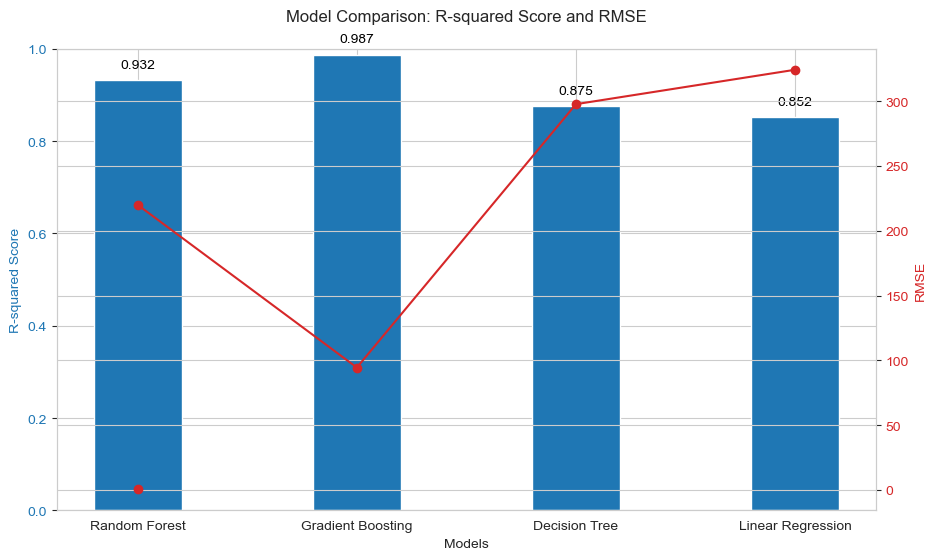

In [92]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Linear Regression']
r2_scores = [rf_r2, gb_r2, dt_r2, r2]
rmse_values = [rf_rmse, gb_rmse, dt_rmse, rmse]

x = np.arange(len(labels))
width = 0.40

# Increase the figure height
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared Score', color='tab:blue')
ax1.bar(x, r2_scores, width, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, 1)

# Displaying R-squared scores on the bars
for i, v in enumerate(r2_scores):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=10, color='black')

ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red') 
ax2.plot(x, rmse_values, width, color='tab:red',  marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=0, fontsize=10)  # Adjust rotation and fontsize
fig.tight_layout(pad=3)
plt.title('Model Comparison: R-squared Score and RMSE',pad=20)

plt.show()


## Insights from Model Comparison Visualization

The visualization presents a comparison between two machine learning models, Random Forest and Gradient Boosting, evaluating their performance in predicting car prices based on various attributes.

## Observations from the Visualization:

1. **R-squared Score (R2 Score):**

- The **Gradient Boosting Regressor** achieves the highest R-squared score of approximately 0.987, indicating that it can explain about 98.7% of the variance in house rent prices. This signifies an excellent fit to the data, capturing a significant portion of the variation in rent prices based on the selected features.
- The **Decision Tree Regressor** has a reasonably high R-squared score, around 0.875, which suggests it can explain 87.5% of the variance in house rent prices. It provides a good fit to the data, capturing a substantial portion of the variation.
- The **Random Forest Regressor** also exhibits a high R-squared score of about 0.932, indicating that it can explain 93.2% of the variance in house rent prices. This signifies an excellent fit to the data, capturing a significant portion of the variation.
- The **Linear Regression** model has a lower R-squared score of about 0.852, indicating that it can explain 85.2% of the variance in house rent prices. While still reasonable, it explains less of the variation compared to the Gradient Boosting, Decision Tree, and Random Forest models.

2. **Root Mean Squared Error (RMSE):**

- The **Gradient Boosting Regressor** has the lowest RMSE of approximately 94.4. A lower RMSE indicates that the model's predictions are very close to the actual house rent prices on average, signifying highly accurate predictions.
- The **Decision Tree Regressor** exhibits an RMSE of about 297.7, which, while higher than the Gradient Boosting Regressor, still indicates relatively accurate predictions with relatively smaller errors.
- The **Random Forest Regressor** shows an RMSE of about 219.96, which is also relatively low, signifying accurate predictions with relatively smaller errors.
- The **Linear Regression** model has the highest RMSE of about 324.28, indicating larger prediction errors and less accuracy compared to the other models.

## Conclusion:
**Based on the R2 Score and RMSE values:**

The **Gradient Boosting Regressor** is the top-performing model in predicting house rent prices. It achieves the highest R-squared score and the lowest RMSE, indicating an excellent fit to the data and the most accurate predictions.
Therefore, for the specific task of house rent prediction, the Gradient Boosting Regressor is the preferred choice, offering the highest accuracy and the best fit to the data among the evaluated models.

## Model Selection and Evaluation Report

### Models Chosen for Evaluation

1. **Random Forest Regressor**:
    
   - **Robustness**: The Random Forest Regressor effectively manages outliers and non-linear data, making it a suitable choice for predicting house rental prices, where data may have variations and non-linear relationships.
   - **Feature Importance**: It identifies the most influential features in predicting rental prices, providing valuable insights into what factors affect the rental rates the most.
   - **Generalization**: Due to its ensemble nature, the Random Forest model is less prone to overfitting, ensuring a model that generalizes well to new rental listings.

2. **Gradient Boosting Regressor**:
    
   - **Sequential Learning**: The Gradient Boosting Regressor utilizes boosting to create a strong model by combining multiple weak models sequentially. This can be advantageous for capturing complex relationships in the rental price data.
   - **Flexibility**: It efficiently handles a mixture of data types, including categorical and numerical features. This is crucial for handling various property features, amenities, and geographical information in house rental predictions.
   - **Regularization**: The model contains built-in regularization hyperparameters to prevent overfitting, ensuring a more robust model for rental price predictions.

3. **Decision Tree Regressor**:
    
   - **Simplicity**: Decision Tree Regressor is a simple yet powerful model. It is capable of capturing non-linear relationships in the data but may be sensitive to outliers and prone to overfitting if not properly pruned.

4. **Linear Regression**:
    
   - **Simplicity**: Linear Regression provides a straightforward interpretation of the relationship between features and rental prices. However, it assumes linear relationships, which may not fully capture the complexity of house rental price data.

**Why Other Models Were Not Chosen**

1. **Support Vector Machines (Regression)**:
    
   - **Feature Sensitivity**: Support Vector Machines can be less effective with many features, and it might require extensive hyperparameter tuning to perform well. In the context of house rental price prediction, where there can be numerous features, models like Random Forest, Gradient Boosting, and Decision Tree are more efficient and require less hyperparameter tuning.

Based on the characteristics and advantages of the Random Forest Regressor, Gradient Boosting Regressor, Decision Tree Regressor, and Linear Regression, they have been chosen for evaluation in predicting house rental prices. These models offer various trade-offs between simplicity, interpretability, and the ability to capture complex relationships in the data, providing a comprehensive evaluation of different modeling approaches for the task.

## Results

Based on the provided evaluation metrics for different regression models, let's interpret the results and determine the better model:

1. **Gradient Boosting Regressor**:
   - **MAE (Mean Absolute Error)**: 25.47 - This indicates, on average, predictions are off by approximately $25.47 in the target units.
   - **MSE (Mean Squared Error)**: 8914.54 - This measures the average squared differences between predictions and actual values.
   - **RMSE (Root Mean Squared Error)**: 94.42 - RMSE is a measure of the standard deviation of prediction errors. Lower values are better.
   - **R2 Score (Coefficient of Determination)**: 0.9875 - R2 is close to 1, indicating the model explains a very high proportion of the variance in the target variable.

2. **Decision Tree Regressor**:
   - **MAE (Mean Absolute Error)**: 158.43 - This model has a higher MAE, indicating larger prediction errors on average.
   - **MSE (Mean Squared Error)**: 88637.11 - MSE is relatively high compared to the other models.
   - **RMSE (Root Mean Squared Error)**: 297.72 - Higher RMSE indicates larger spread in prediction errors.
   - **R2 Score (Coefficient of Determination)**: 0.8754 - The R2 score is still good but not as high as the Gradient Boosting model.

3. **Random Forest Regressor**:
   - **MAE (Mean Absolute Error)**: 121.31 - MAE is intermediate and lower than the Decision Tree model.
   - **MSE (Mean Squared Error)**: 48382.51 - MSE is relatively lower than the Decision Tree model.
   - **RMSE (Root Mean Squared Error)**: 219.96 - RMSE is moderate.
   - **R2 Score (Coefficient of Determination)**: 0.9320 - The R2 score is good, indicating a relatively high proportion of explained variance.

4. **Linear Regression**:
   - **MAE (Mean Absolute Error)**: 114.40 - MAE is similar to the Random Forest model.
   - **MSE (Mean Squared Error)**: 105155.52 - MSE is relatively high.
   - **RMSE (Root Mean Squared Error)**: 324.28 - RMSE is high compared to other models.
   - **R2 Score (Coefficient of Determination)**: 0.8522 - The R2 score is good but lower than the Gradient Boosting and Random Forest models.

## Interpretation and Conclusion:

- The **Gradient Boosting Regressor** stands out as the best model based on the evaluation metrics. It has the lowest MAE, MSE, and RMSE, indicating the smallest prediction errors, and the highest R2 score, indicating it explains the most variance in the target variable.

- The **Random Forest Regressor** also performs well, with competitive MAE, MSE, RMSE, and R2 values.

- The **Decision Tree Regressor** is less accurate with higher prediction errors compared to the Gradient Boosting and Random Forest models.

- The **Linear Regression** model, while having a good R2 score, shows higher prediction errors in terms of MAE, MSE, and RMSE.

Based on these metrics, the Gradient Boosting Regressor is likely the better model for your specific problem, providing the most accurate predictions and explaining a high proportion of variance in the target variable.
